In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1koDgDGsqC4kvMn5tbKULM2HX_DqIA-Em'}) # replace the id with id of file you want to access
downloaded.GetContentFile('kmeans.csv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime as dt
%matplotlib inline
df=pd.read_csv("kmeans.csv")
df

,X,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


In [5]:

f1=df['X'].values
f2=df['y'].values
X=np.array(list(zip(f1,f2)))
print(X)


[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


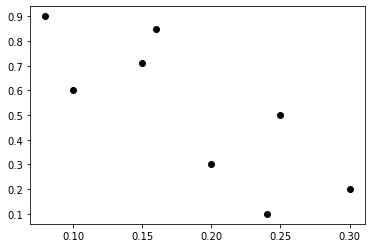

In [7]:
C_x=np.array([0.1,0.3])
C_y=np.array([0.6,0.2])
centroids=C_x,C_y
colmap = {1:'r', 2:'b'}
plt.scatter(f1,f2,color='k')
plt.show()

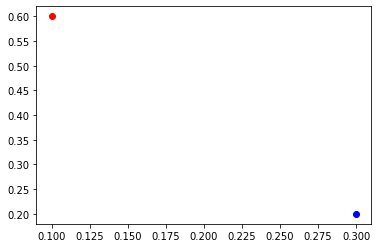

In [8]:
plt.scatter(C_x[0],C_y[0],color=colmap[1])
plt.scatter(C_x[1],C_y[1],color=colmap[2])
plt.show()




In [9]:
C= np.array(list((C_x,C_y)),dtype=np.float32)
print (C)

[[0.1 0.3]
 [0.6 0.2]]


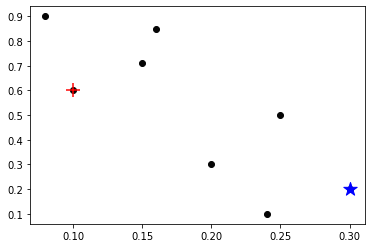

In [10]:
plt.scatter(f1,f2,c='#050505')
plt.scatter(C_x[0],C_y[0],marker='+',s=200,c='r')
plt.scatter(C_x[1],C_y[1],marker='*',s=200,c='b')
plt.show()

In [11]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=0)
model.fit(X)
labels=model.labels_
print(labels)

[1 1 1 1 0 0 0 0]


In [12]:
count=0
for i in range(len(labels)):
  if(labels[i]==1):
    count=count+1
print('number of population around cluster 2:',count-1)

number of population around cluster 2: 3


In [13]:
new_centroids=model.cluster_centers_
print('Previous value of m1 and m2 is:::')
print('m1===',centroids[0])
print('m1===',centroids[1])

Previous value of m1 and m2 is:::
m1=== [0.1 0.3]
m1=== [0.6 0.2]


In [14]:
print('Updates value of m1 and m2 is:::')
print('m1===',new_centroids[0])
print('m1===',new_centroids[1])

Updates value of m1 and m2 is:::
m1=== [0.2475 0.275 ]
m1=== [0.1225 0.765 ]
